---
title: "Coding Final Project"
description: "DGT HUM 140: Coding for Humanities"
author: "Bryce GombaJones"
date: "August 8, 2024"

---

#  <center><ins>Disparities in Los Angeles Arrests </ins></center> 

## Introduction

We will be analyzing the publicly recorded data on arrests made in Los Angeles county from 2020 to present day. Since arrests are the first process in the criminal justice system, examining them can provide more insight into potential policing malpractices, underlying biases, and the initial stages of racial and ethnic disparities.By focusing on a city known for its racial and ethnic diversity, we aim to address key research questions: Are there disparities in arrest trends among different racial or ethnic groups? Do social factors, such as neighborhoods and demographic profiles, influence policing practices and arrest rates? This project aims to reveal patterns in LA that’re concordant to the broader national trends, while also highlighting any unique local dynamics. 

## Method

This project visualizes and analyzes a dataset, provided by LAPD and made public by the LA city database, which compiles the recordings of arrests made in Los Angeles county from 2020 to present day. It’s updated weekly and consists of mostly categorical data, including the following columns: 'Type', 'Area', 'Age', 'Charge', 'Offense', and 'LAT' and 'LON' (latitude and longitude coordinates of the arrest location). Since the dataset was very extensive, the processes of filtering and cleaning the data were utilized in order to better operationalize it. For instance, to filter the data, columns that weren’t pertinent to the research questions mentioned above were omitted. These included ‘Report ID’, ‘Area ID’, ‘Charge Group Code’, etc.
After filtering and cleaning the data through google sheets, the downloaded csv file was uploaded to jupyterhub in order to make coding and analysis through the Python notebook possible. Then, importing libraries such as pandas, matplotlib, numpy, and was necessary in order to read the csv file, make visualizations, and work with multidimensional data or arrays. With the help from these libraries, visualizations such as line plots, bar graphs, and stacked bar graphs were created to represent the data along with descriptive statistics. Incorporated in the results, the visualizations along with the trend analysis will be found, including yearly trends and percentage calculations.


## Results

In [1]:
# import libraries
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical operations
import pandas as pd 
data = pd.read_csv('final_dataset.csv')
data

,Type,Year,Area,Age,Sex,Descent,Charge,Offense,LAT,LON
0,RELEASED,2024,Hollywood,18,M,Hispanic,Against Family/Child,Infraction,34.1017,-118.3224
1,BOOKED,2024,Newton,25,M,Hispanic,Against Family/Child,Misdemeanor,33.9748,-118.2565
2,RELEASED,2024,Rampart,29,M,Black,Against Family/Child,Misdemeanor,34.0491,-118.2823
3,BOOKED,2024,Newton,58,M,Hispanic,Against Family/Child,Felony,34.0366,-118.2469
4,BOOKED,2024,Foothill,40,M,Other,Against Family/Child,Felony,34.2570,-118.3994
...,...,...,...,...,...,...,...,...,...,...
298753,RELEASED,2020,Northeast,36,M,White,Not Recorded,Misdemeanor,34.0947,-118.2877
298754,RELEASED,2020,Northeast,40,F,White,Not Recorded,Misdemeanor,34.1441,-118.2254
298755,RELEASED,2020,Northeast,48,M,White,Not Recorded,Misdemeanor,34.0935,-118.2866
298756,RELEASED,2020,Northeast,39,F,White,Not Recorded,Misdemeanor,34.1381,-118.1874


From this sample of entries, one is able to view the columns/variables as well as some of the values that will be used in this analysis. There are also some summary statistics that reveal the most frequent value for each of the columns. Just to name a few, most of the arrests were booked, during 2021, in Rampart, and were individuals of hispanic descent.

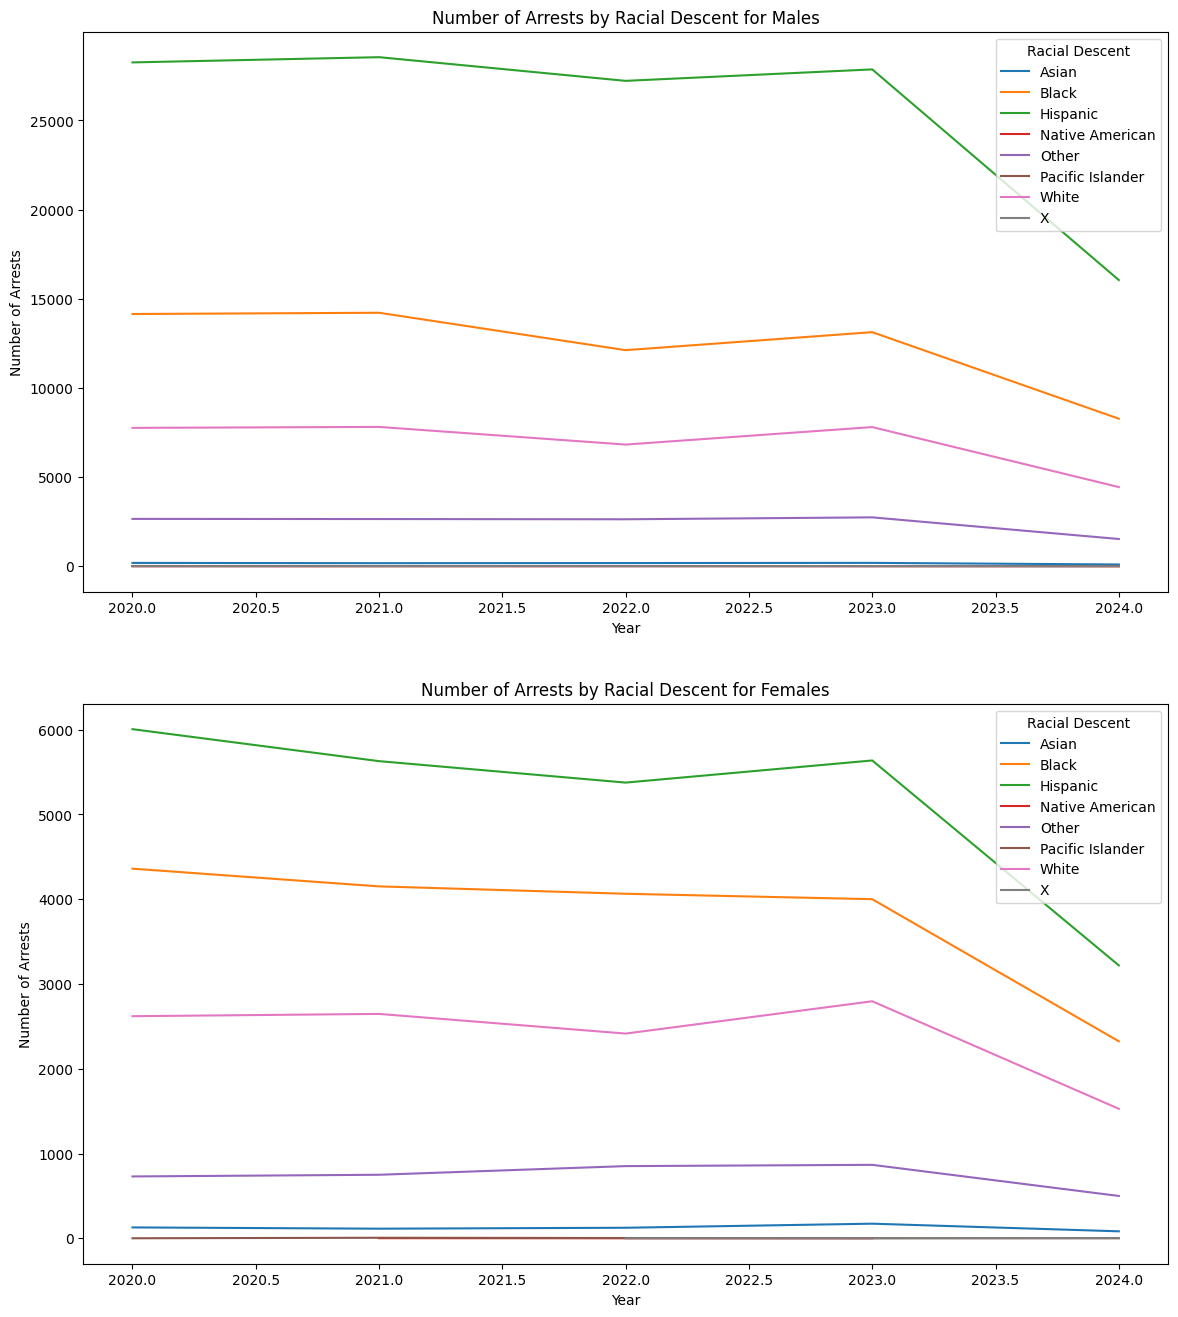

In [2]:
male = data[data.Sex == 'M']
female = data[data.Sex == 'F']
grouped_male = male.groupby(['Year', 'Descent']).size().reset_index(name = 'Count')
pivot_male = grouped_male.pivot(index = 'Year', columns = 'Descent', values = 'Count')

grouped_female = female.groupby(['Year', 'Descent']).size().reset_index(name = 'Count')
pivot_female  = grouped_female.pivot(index = 'Year', columns = 'Descent', values = 'Count')


years_male = pivot_male.index.to_numpy()

descent_columns_male  = pivot_male.columns.to_numpy()
counts_male = pivot_male.to_numpy()

years_female =  pivot_female.index.to_numpy()
descent_columns_female = pivot_female.columns.to_numpy()
counts_female = pivot_female.to_numpy()


fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 16))

# plot for males
for i, descent in enumerate(descent_columns_male):
    
    ax1.plot(years_male, counts_male[:, i], label=descent)

ax1.set_title('Number of Arrests by Racial Descent for Males')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Arrests')
ax1.legend(title = 'Racial Descent')

# plot for females
for i, descent in enumerate(descent_columns_female):
    ax2.plot(years_female, counts_female[:, i], label = descent)

    
    
ax2.set_title('Number of Arrests by Racial Descent for Females')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Arrests')
ax2.legend(title =  'Racial Descent')

plt.show()

These line charts represent the number of arrests made over time, by race. For both males and females, Hispanic people are arrested at the highest rate, followed by black people and then white people. In all cases, the number of arrests are highest in 2020 and then either plateau or decrease, with 2024 having the lowest rate of arrests across all races.

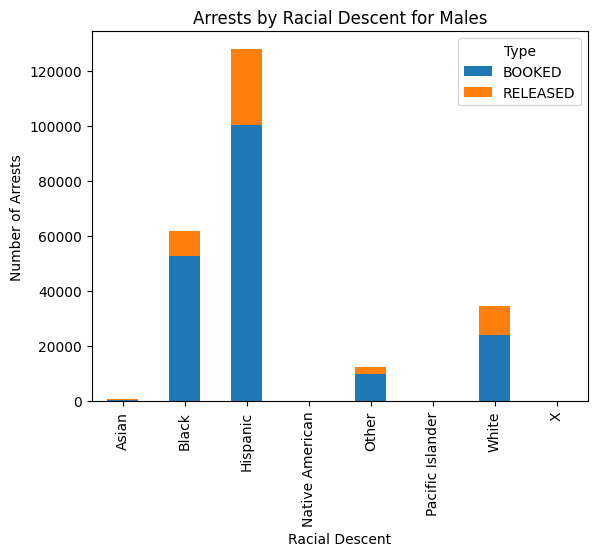

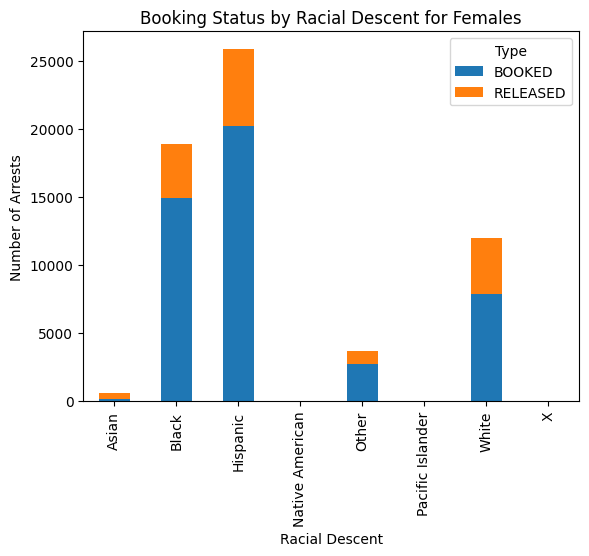

Percentage of Arrests by Racial Descent for Males: Type                 BOOKED   RELEASED
Descent                               
Asian             29.832936  70.167064
Black             85.291836  14.708164
Hispanic          78.573774  21.426226
Native American   90.000000  10.000000
Other             79.754400  20.245600
Pacific Islander  80.952381  19.047619
White             69.837513  30.162487
X                  7.692308  92.307692
Percentage of Arrests by Racial Descent for Females: Type                  BOOKED    RELEASED
Descent                                 
Asian              22.756410   77.243590
Black              78.898354   21.101646
Hispanic           78.177319   21.822681
Native American   100.000000    0.000000
Other              74.236280   25.763720
Pacific Islander  100.000000    0.000000
White              65.575546   34.424454
X                   0.000000  100.000000


In [3]:
grouped_male = male.groupby(['Descent', 'Type']).size().unstack(fill_value = 0)
grouped_female = female.groupby(['Descent', 'Type']).size().unstack(fill_value = 0)

# plot for males 
grouped_male.plot(kind  = 'bar', stacked = True)
plt.title('Arrests by Racial Descent for Males')
plt.xlabel('Racial Descent')
plt.ylabel('Number of Arrests')
plt.show()

# plot for females
grouped_female.plot(kind = 'bar', stacked = True)
plt.title('Booking Status by Racial Descent for Females')
plt.xlabel('Racial Descent')
plt.ylabel('Number of Arrests')
plt.show()


percentages_male = grouped_male.div(grouped_male.sum(axis = 1), axis = 0) * 100

percentages_female =   grouped_female.div(grouped_female.sum(axis = 1), axis = 0) * 100
print("Percentage of Arrests by Racial Descent for Males:", percentages_male)
print("Percentage of Arrests by Racial Descent for Females:", percentages_female)


This set of barcharts represent the number of arrests by racial descent as well as whether the arrest was sent to booking or if the detainee was released from custody. 30% of arrests that involved White men, 21% involving Hispanic men, and 14% involving Black men were released from custody at the time of the arrest. In addition, 21% of arrests involving Black women and Hispanic women were released from custody while 34% of arrests involving white women were released.


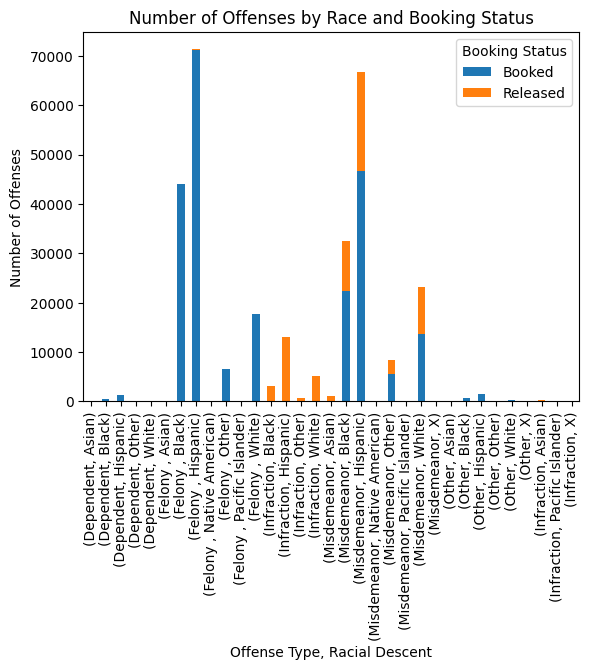

In [4]:
grouped = data.groupby(['Type', 'Offense', 'Descent']).size().unstack(level=[1, 2], fill_value=0)
bookings = grouped.loc['BOOKED']

releases =  grouped.loc['RELEASED']
combined = pd.concat([bookings, releases], axis=1, keys=['Booked', 'Released'])

combined.plot(kind='bar', stacked=True)
plt.title('Number of Offenses by Race and Booking Status')
plt.xlabel('Offense Type, Racial Descent')
plt.ylabel('Number of Offenses')
plt.legend(title='Booking Status')
plt.show()

This stacked bar chart represents the number of releases or bookings by race and offense type. All felonies were taken to booking and a majority of infractions were released. 40% of arrests involving white people charged with misdemeanors got released. 31% and 30% of arrests involving Black people and Hispanic people, respectively, charged with misdemeanors got released. Lastly, 4% of arrests involving Black people charged with infractions go to booking.


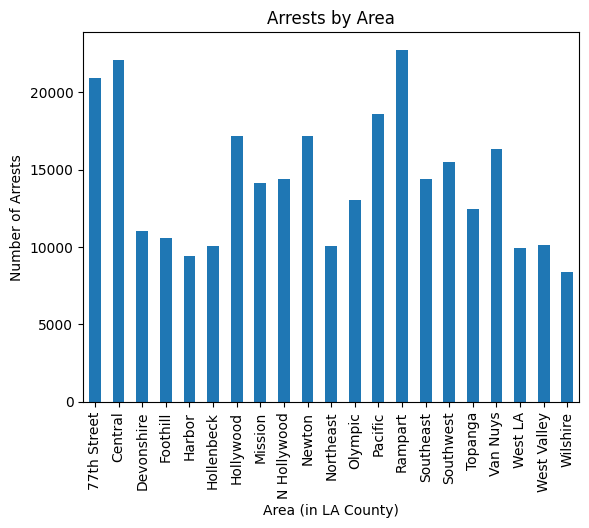

In [9]:
arrests_by_area = data['Area'].value_counts()
arrests_by_area = arrests_by_area.sort_index()

arrests_by_area.plot(kind = 'bar')


plt.title('Arrests by Area')
plt.xlabel('Area (in LA County)')
plt.ylabel('Number of Arrests')



plt.show()

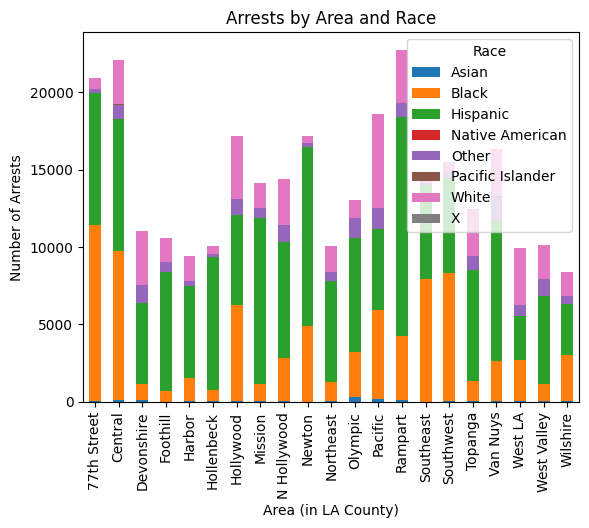

In [6]:
race_by_area = data.groupby(['Area', 'Descent']).size().unstack(fill_value = 0)

race_by_area = race_by_area.sort_index()


race_by_area.plot(kind = 'bar', stacked = True,)
plt.title('Arrests by Area and Race')
plt.xlabel('Area (in LA County)')
plt.ylabel('Number of Arrests')
plt.legend(title = 'Race')


plt.show()

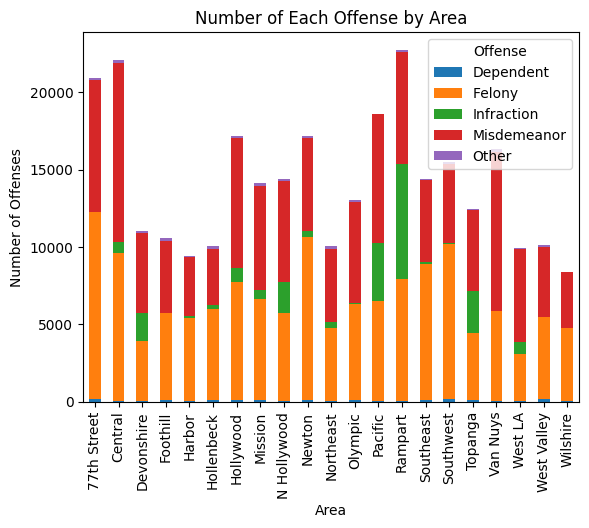

In [7]:
offenses_by_area = data.groupby(['Area', 'Offense']).size().unstack(fill_value=0)
offenses_by_area = offenses_by_area.sort_index()

offenses_by_area.plot(kind ='bar', stacked = True)
plt.title('Number of Each Offense by Area')

plt.xlabel('Area')
plt.ylabel('Number of Offenses')
plt.legend(title = 'Offense')
plt.show()


## Discussion

This analysis reveals a consistent pattern in the arrest rates among different racial and ethnic groups. Hispanic people are arrested at the highest rate, followed by Black and then White people. This trend aligns with national data, which often shows a disproportionate impact of the criminal justice system on people of color. Additionally, the analysis of booking and release rates by race shows notable inequalities. For instance, a higher percentage of white people are released from custody at the time of the arrest compared to Black and Hispanic people.   

Specifically, 30% of arrests involving White men result in release, compared to 21% for Hispanic men and 14% for Black men. This disparity is also evident among women, with a higher percentage of White women being released compared to their Black and Hispanic counterparts. These findings suggest that there may be differential treatment in the decision-making process at the point of arrest. Factors such as perceived risk and socioeconomic status could influence these outcomes. This disparity raises concerns about potential biases in arrest processes and the need for further investigation into the factors driving these differences.  

The data on offenses and their outcomes suggests that felonies are predominantly booked, while infractions are mostly released. This trend is expected, as the severity of the offense dictates the processing outcome. However, the percentage of misdemeanor arrests resulting in release varies by race. White people charged with misdemeanors have a higher release rate (40%) compared to Black (31%) and Hispanic (30%) people. Also, although it's not as significant, 4% of black people are booked for infraction offenses while every other race is released at 99-100%. This also signifies a sort of disparity.  

The spatial analysis of arrests shows that areas like 77th Street, Central LA, and Rampart have the highest number of arrests. These areas also show significant racial and ethnic variations in arrest rates. Such disparities could be indicative of varying levels of policing across neighborhoods. It is crucial to examine whether these patterns reflect targeted policing practices or broader community characteristics.  

The findings from this analysis highlight the need for ongoing examination of arrest practices and outcomes within the criminal justice system. The observed inequalities in arrest rates, booking and release decisions, and geographical patterns suggest that there may be systemic biases that affect people of color disproportionately, maybe even more in diverse cities like Los Angeles. Future research should aim to explore the factors contributing to these disparities in greater detail. By addressing these issues further, we can work towards a more just and equitable society, where arrest and incarceration rates reflect fairness rather than systemic inequality.


## Works Cited

https://data.lacity.org/Public-Safety/Arrest-Data-from-2020-to-Present/amvf-fr72/about_data (dataset)  

E. Ann Carson. “Prisons Report Series: Preliminary Data Release.” Bureau of Justice Statistics,   
https://bjs.ojp.gov/library/publications/prisons-report-series-preliminary-data-release#:~:text=At%20yearend%202022%2C%2032%25%20of,Hawaiian%2C%20or%20Other%20Pacific%20Islander. 

U.S. Census Bureau Quickfacts: United States, www.census.gov/quickfacts/fact/table/US/PST045219. Accessed 2 Aug. 2024. 